# Curve Fitting Discussion

Do the following: 
- 1. Plot the data from the file.
    - Note that these are NOT csv files, and thus we need to manually specify the delimiter. you might also need to account for comments / extra metadata in the file. Welcome to data cleaning :) 
    - Include axis labels and a title!
        - Note that the files do not include units :( So I found them already: 
        - HAL1211: ppt (parts per trillion)
        - CH4: ppb (parts per billion)
        - For both, the dates are numerical values corresponding to years.
- 2. Fit the appropriate model to the data. You can use scipy.optimize or numpy.polyfit.
- 3. Calculate the reduced chi-squared value
- 4. Print out the parameters, their errors, the reduced chi-squared value, and the final equation.


You can also find the data sets from here. These are live sets: they are updated frequently, so they looked different when I initially made these problems last year (and contain more data now).
</br></br>Sources: 
- https://gml.noaa.gov/hats/gases/halon1211.html
- https://gml.noaa.gov/ccgg/trends_ch4/

More data if you're interested: 
- https://gml.noaa.gov/hats/data.html

_HAL1211 is Halon 1211, or bromochlorodifluoromethane, used in fire extinguishers. Its manufacture was banned in the 90s, but use as a fire suppresant is still unrestricted.  it is great for putting out fires but it is terrible for the ozone layer._
</br> </br>_CH4 is methane, a very potent greenhouse gas with numerous sources._

In [2]:
import numpy as np
import pandas as pd
import scipy.optimize as fit
import matplotlib.pyplot as plt

,dec_date,HAL1211,HAL1211_sd
0,1992.05191,2.934,0.012
1,1992.12842,2.925,0.024
2,1992.62022,3.018,0.033
3,1992.71311,3.191,0.004
4,1992.90710,3.145,0.106


1354.3515569959138

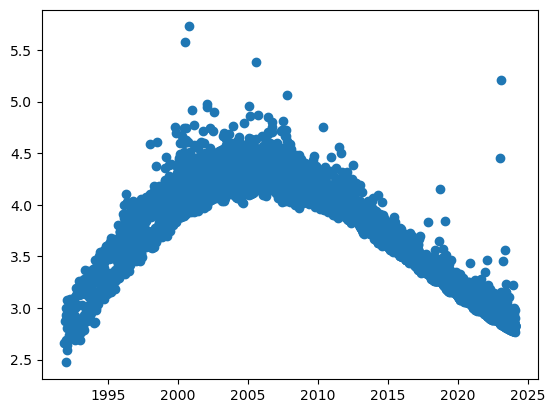

In [38]:
HAL1211 = pd.read_csv("/Users/fchou/Downloads/HAL1211_GCMS_flask.txt", sep='\t',skiprows=1)
HAL1211 = HAL1211[["dec_date","HAL1211","HAL1211_sd"]]
display(HAL1211.head())
plt.figure()
plt.scatter(HAL1211["dec_date"],HAL1211["HAL1211"])

def quad(x,a,b,c):
    return a * x**2 + b*x +c
p0 = [1,1,1]
para,cov = fit.curve_fit(quad,HAL1211["dec_date"],HAL1211["HAL1211"],p0)

HAL1211 = HAL1211[HAL1211['HAL1211_sd']!=0.000]

chiH = sum(((HAL1211["HAL1211"]-quad(HAL1211["dec_date"],para[0],para[1],para[2]))//HAL1211["HAL1211_sd"])**2)
red_chiH = chiH / (len(HAL1211["HAL1211"])-3)
red_chiH

[1644.68 1657.29 1670.08 1682.7  1693.11 1704.54 1714.42 1724.84 1735.47
 1736.49 1742.07 1748.82 1751.29 1754.53 1765.55 1772.35 1773.33 1771.2
 1772.66 1777.33 1777.04 1774.15 1774.95 1781.37 1787.01 1793.53 1798.93
 1803.14 1808.03 1813.41 1822.57 1834.27 1843.12 1849.67 1857.33 1866.58
 1878.93 1895.28 1911.81 1922.56]


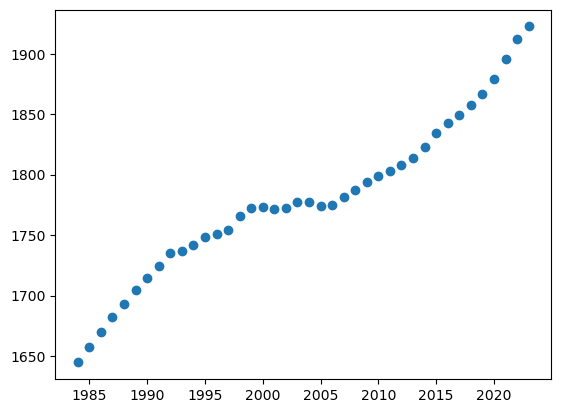

In [29]:
file = "/Users/fchou/Downloads/ch4_annmean_gl.csv"
data = np.loadtxt(file, delimiter = ',',skiprows=45)
year = data[:,0]
mean = data[:,1]
unc = data[:,2]
plt.figure()
plt.scatter(year,mean)
plt.show()

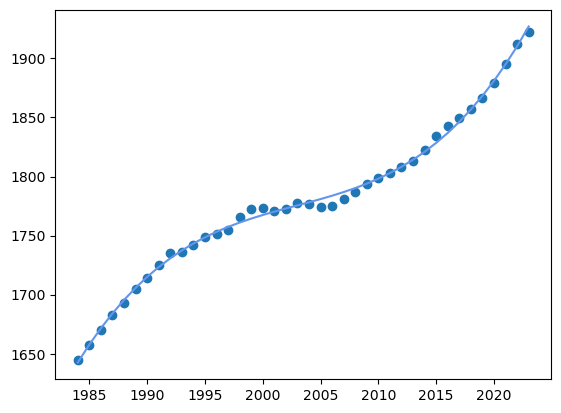

In [45]:
def f(x,m,b):
    return m*x+b
def cubic(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d
p1 = [1,1,1,1]
paraC,covC = fit.curve_fit(cubic,year,mean,p1)
plt.figure()
plt.scatter(year,mean)
plt.plot(year,cubic(year,paraC[0],paraC[1],paraC[2],paraC[3]),color = 'cornflowerblue')
plt.show()
p0 = [1,2]
parameters, covariance_matrix = fit.curve_fit(f,year,mean,p0)

In [47]:
err = []
for i in range(len(covC)):
    err.append(covC[i,i])
err

[2.0317825173045406e-07,
 7.3405561437689215,
 29466194.393164795,
 13142031165911.031]

In [31]:
parameters

array([ 5.56710788e+00, -9.37403989e+03])

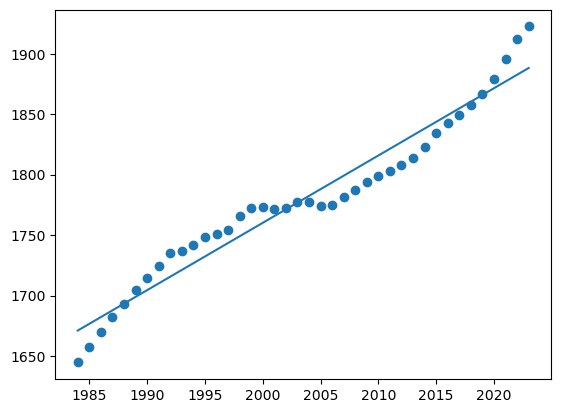

In [42]:
plt.figure()
plt.plot(year,f(year,parameters[0],parameters[1]))
plt.scatter(year,mean)
plt.show()